In [ ]:
import os
import subprocess
from pathlib import Path

"""
Dynamically find the project root (where .git exists) and set it as the current working directory.
"""
project_root = Path(subprocess.check_output(['git', 'rev-parse', '--show-toplevel'], text=True).strip())
os.chdir(project_root)

In [ ]:
%load_ext autoreload
%autoreload 2

import warnings; warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline  

#NLP libraries
import spacy

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [4]:
BA_US_knn_text = pd.read_csv('data/knnData/BA_US_knn_text.csv')
print(BA_US_knn_text.shape)
BA_US_knn_text.head(2)

(6331638, 17)


,beer_name,beer_id,brewery_name,brewery_id,style,abv,user_id,appearance,aroma,palate,taste,overall,rating,text,avg,user_state,beer_state
0,Kupfer Kolsch,289320.0,Copper State Brewing Company,49595.0,Kölsch,4.4,n2185.211743,2.5,4.00,4.0,3.75,3.75,3.76,NaN,3.76,North Carolina,Wisconsin
1,Northwestern Alt,289321.0,Copper State Brewing Company,49595.0,Altbier,4.6,n2185.211743,3.0,3.75,4.0,3.50,3.50,3.58,NaN,3.58,North Carolina,Wisconsin


In [3]:
'''
reviews = BA_US_knn_text[['text']].dropna() 
#we remove 4 million rows, thats a lot! the numbers check out tho
print(reviews.shape)
reviews.head(2)

#remove new lines #unnecessary but just in case
reviews['text'] = reviews['text'].apply(lambda l: " ".join(l.split()))

# Concatenate all rows into a single string without any separators
text = " ".join(reviews["text"])
print(text[0:1000])

nlp = spacy.load("en_core_web_sm")

#total length of 1_241_522_883; shit thats a lot of chunks, over 10 thousand... uh oh
def split_text_into_chunks(large_text, chunk_size=100_000): 
    for i in range(0, len(large_text), chunk_size):
        chunk = large_text[i:i + chunk_size]
        doc = nlp(chunk)
        print("Chunk: ",i//chunk_size)
        
        # Yield the processed chunk for further processing (optional)
        yield doc

docs = []
# Split the text into chunks and process them
for doc in split_text_into_chunks(text, chunk_size=100_000):
    docs.append(doc)
'''


'\nreviews = BA_US_knn_text[[\'text\']].dropna() \n#we remove 4 million rows, thats a lot! the numbers check out tho\nprint(reviews.shape)\nreviews.head(2)\n\n#remove new lines #unnecessary but just in case\nreviews[\'text\'] = reviews[\'text\'].apply(lambda l: " ".join(l.split()))\n\n# Concatenate all rows into a single string without any separators\ntext = " ".join(reviews["text"])\nprint(text[0:1000])\n\nnlp = spacy.load("en_core_web_sm")\n\n#total length of 1_241_522_883; shit thats a lot of chunks, over 10 thousand... uh oh\ndef split_text_into_chunks(large_text, chunk_size=100_000): \n    for i in range(0, len(large_text), chunk_size):\n        chunk = large_text[i:i + chunk_size]\n        doc = nlp(chunk)\n        print("Chunk: ",i//chunk_size)\n        \n        # Yield the processed chunk for further processing (optional)\n        yield doc\n\ndocs = []\n# Split the text into chunks and process them\nfor doc in split_text_into_chunks(text, chunk_size=100_000):\n    docs.append

Total length of 1_241_522_883; shit thats a lot of chunks, over 10 thousand... <br> Lets try on a single state first...

In [4]:
states = BA_US_knn_text['user_state'].value_counts()
states 

user_state
Pennsylvania      570718
California        564116
Illinois          489065
New York          419737
Massachusetts     361409
Texas             313863
Ohio              271878
New Jersey        236369
Michigan          216867
Florida           209717
Virginia          202417
Minnesota         198266
North Carolina    189276
Washington        184776
Connecticut       152629
Colorado          148760
Wisconsin         144959
Maryland          142537
Indiana           134255
Georgia           119141
Missouri           97745
Oregon             87687
New Hampshire      81252
Kentucky           77066
South Carolina     66402
Arizona            57791
Tennessee          54747
Iowa               54468
Kansas             45382
Vermont            43540
Rhode Island       41641
Maine              38493
Alabama            35312
Louisiana          32826
Oklahoma           27660
Delaware           23962
New Mexico         23874
Nebraska           22517
West Virginia      21663
Nevada        

Hawaii has the least at ~6000 so lets go with that first

In [5]:
def prepare_state_data_for_nlp(state_name, df):
    df_state_name = df[df['user_state'] == state_name].reset_index(drop=True)
    print(df_state_name.shape)
    df_state_name = df_state_name.dropna(subset='text')
    print("Drop NA: ",df_state_name.shape)
    df_local = df_state_name[df_state_name['beer_state'] == state_name]
    print("Locals: ",df_local.shape)
    df_nonlocal = df_state_name[df_state_name['beer_state'] != state_name]
    print("Non locals: ",df_nonlocal.shape)
    
    return df_local, df_nonlocal

In [6]:
'''
hawaii = BA_US_knn_text[BA_US_knn_text['user_state'] == 'Hawaii'].reset_index(drop=True)
print(hawaii.shape)
hawaii.head(2)
hawaii = hawaii.dropna(subset='text')
print(hawaii.shape)
hawaii.head(2)
hawaii_local = hawaii[hawaii['beer_state'] == 'Hawaii']
print(hawaii_local.shape)
hawaii_nonlocal = hawaii[hawaii['beer_state'] != 'Hawaii']
print(hawaii_nonlocal.shape)
'''

"\nhawaii = BA_US_knn_text[BA_US_knn_text['user_state'] == 'Hawaii'].reset_index(drop=True)\nprint(hawaii.shape)\nhawaii.head(2)\nhawaii = hawaii.dropna(subset='text')\nprint(hawaii.shape)\nhawaii.head(2)\nhawaii_local = hawaii[hawaii['beer_state'] == 'Hawaii']\nprint(hawaii_local.shape)\nhawaii_nonlocal = hawaii[hawaii['beer_state'] != 'Hawaii']\nprint(hawaii_nonlocal.shape)\n"

In [7]:
hawaii_local, hawaii_nonlocal = prepare_state_data_for_nlp('Hawaii', BA_US_knn_text)

(6278, 17)
Drop NA:  (2346, 17)
Locals:  (221, 17)
Non locals:  (2125, 17)


In [8]:
nlp = spacy.load("en_core_web_sm")

#total length of 1_307_839; thats still a lot of chunks oops...
def split_text_into_chunks(large_text, chunk_size=100_000): 
    print("Need around "+ str(round(len(large_text)/chunk_size))+" chunks")
    for i in range(0, len(large_text), chunk_size):
        chunk = large_text[i:i + chunk_size]
        doc = nlp(chunk)
        print("Chunk: ",i//chunk_size)
        
        # Yield the processed chunk for further processing (optional)
        yield doc
        
        
def create_npl(df):
    #remove new lines #unnecessary but just in case
    df['text'] = df['text'].apply(lambda l: " ".join(l.split()))
    df_text = " ".join(df["text"]) #concat all rows
    print("Length of text: ",len(df_text))
    print(df_text[0:600])
    
    docs = []
    # Split the text into chunks and process them
    for doc in split_text_into_chunks(df_text, chunk_size=100_000):
        docs.append(doc)
    print("Done")  
    return docs

In [9]:
docs_hawaii_local = create_npl(hawaii_local)
docs_hawaii_nonlocal = create_npl(hawaii_nonlocal)

Length of text:  105621
Uploaded image you seeBought a 6-pack from Foodland $7.88Smell of strawberry and orangeCloudy golden colorLight-medium mouthfeelMedium-high carbonationTaste of strawberry, orange, and banana comes through, some tartnessOverall a refreshing beer for hot weather. I would drink again. Not a large head, a little was there, and a nice dark color. Smell is typical of a porter, but with a backbone of what one would expect with a barrel aged beer. Taste was similar, maybe a little sweet with a nice booziness quality. One that I like with my barrel aged beers. One worth seeking out if you are on the is
Need around 1 chunks
Chunk:  0
Chunk:  1
Done
Length of text:  1202217
At 8.5% abv and $8 a 4 pack I certainly can't complain. At the price point this Imperial IPA was on the mark. Bought from Bev MartDark black colorLow CarbonationBurnt roasted malt smellTaste of smokey chocolate, alcohol taste is noticeable Overall I would not buy it again. To me a good beer is you can f

In [ ]:
def sentiment_analysis(docs, plots = False):
   analyzer = SentimentIntensityAnalyzer()

   positive_sent = []
   #iterate through the sentences, get polarity scores, choose a value
   [positive_sent.append(analyzer.polarity_scores(sent.text)['pos']) for doc in docs for sent in doc.sents]

   negative_sent = []
   [negative_sent.append(analyzer.polarity_scores(sent.text)['neg']) for doc in docs for sent in doc.sents]

   total_sent = []
   [total_sent.append(analyzer.polarity_scores(sent.text)['compound']) for doc in docs for sent in doc.sents]
    
   positive_hist_y, positive_hist_x, _ = plt.hist(positive_sent, bins=15)
   negative_hist_y, negative_hist_x, _ = plt.hist(negative_sent, bins=15)
   total_hist_y, total_hist_x, _ = plt.hist(total_sent, bins=15)
   
   plt.clf() #otherwise our graphs superpose
   #plt.cla()
   
   if plots: 
      #so we can dynamically set y max
      max_y = max(max(positive_hist_y), max(negative_hist_y), max(total_hist_y))
      max_y = max_y*1.1 #makes the graphs better
      print('Max y: ',max_y)
      if max_y > 1000: #always the case I think
         max_y = round(max_y, -3)    
      print('Max y: ',max_y)
      
      plt.hist(positive_sent,bins=15)
      plt.xlim([0,1])
      plt.ylim([0,max_y])
      plt.xlabel('Positive sentiment')
      plt.ylabel('Number of sentences')
      plt.tight_layout()
      plt.show()
      
      
      plt.hist(negative_sent,bins=15)
      plt.xlim([0,1])
      plt.ylim([0,max_y])
      plt.xlabel('Negative sentiment')
      plt.ylabel('Number of sentences')
      plt.tight_layout()
      plt.show()
      
      
      plt.hist(total_sent,bins = 15)
      plt.xlim([-1,1])
      plt.ylim([0,max_y])
      plt.xlabel('Compound sentiment')
      plt.ylabel('Number of sentences')
      plt.tight_layout()
      plt.show()
    
   sents = [analyzer.polarity_scores(sent.text)['compound'] for doc in docs for sent in doc.sents]
   print('Number of positive sentences:',sum(np.array(sents)>=0.05))
   print('Number of negative sentences:',sum(np.array(sents)<=-0.05))
   print('Number of neutral sentences:',sum(np.abs(np.array(sents))<0.05))
    
   return sents

In [11]:

#vs = analyzer.polarity_scores(hawaii_text)

c:\Users\Enzo\anaconda3\envs\ada\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
c:\Users\Enzo\anaconda3\envs\ada\Lib\site-packages\IPython\core\pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


Max y:  1659.9
Max y:  2000.0


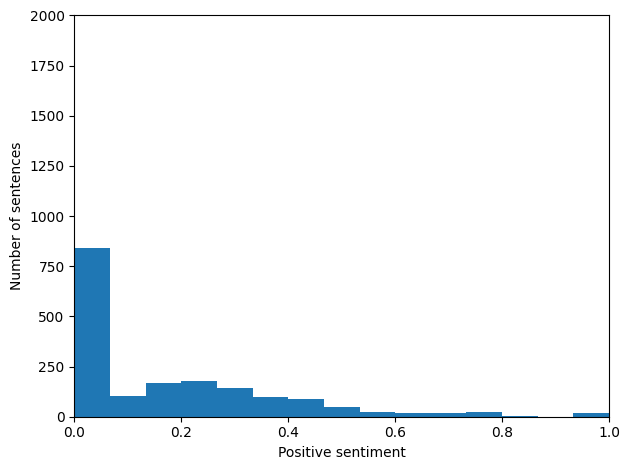

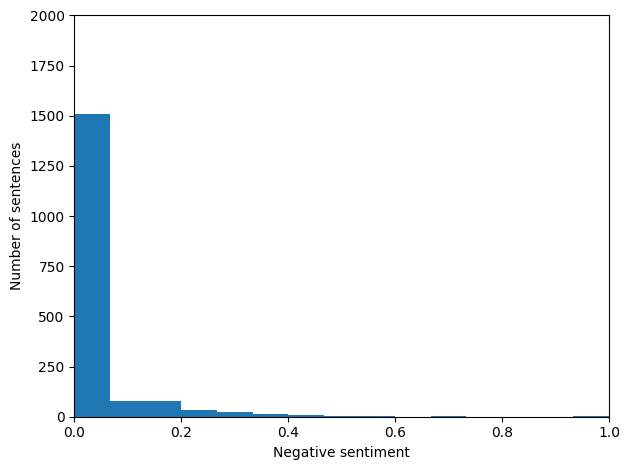

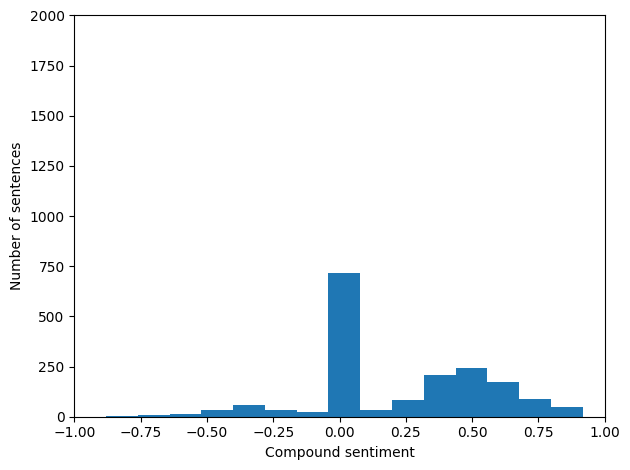

Number of positive sentences: 889
Number of negative sentences: 173
Number of neutral sentences: 703
Max y:  18100.5
Max y:  18000.0


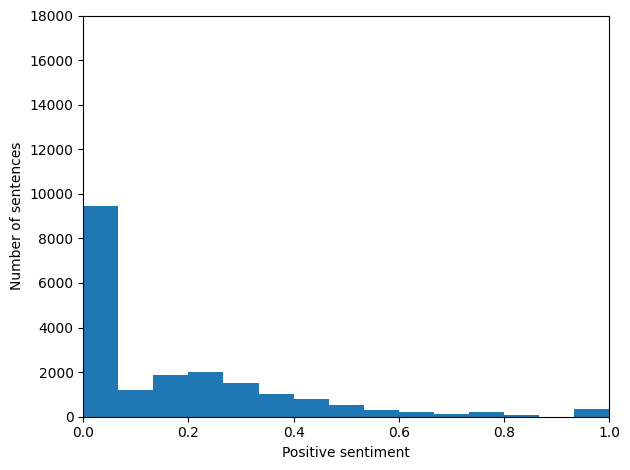

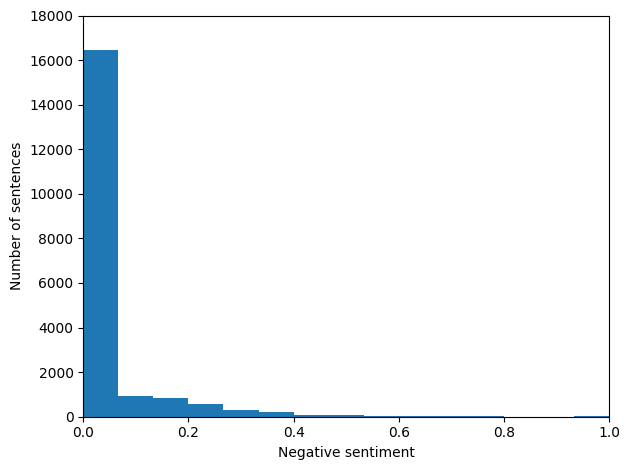

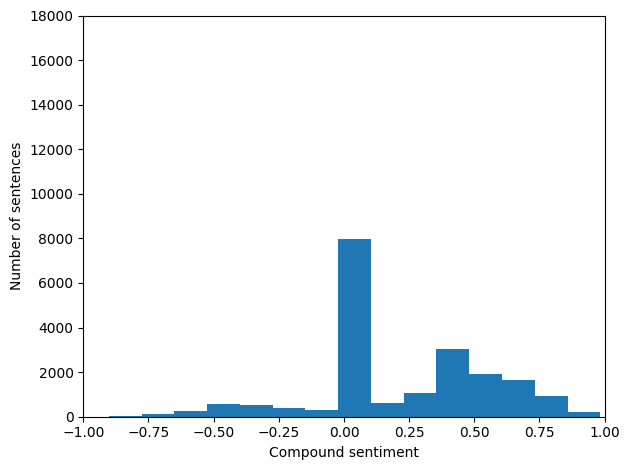

Number of positive sentences: 9658
Number of negative sentences: 2192
Number of neutral sentences: 7811


In [12]:
local_sentences = sentiment_analysis(docs_hawaii_local)
nonlocal_sentences = sentiment_analysis(docs_hawaii_nonlocal)

In [13]:
local_sentences = np.array(local_sentences)
nonlocal_sentences = np.array(nonlocal_sentences)

total_local_sentences = len(local_sentences)
positive_local_sentences = sum(local_sentences >= 0.05)
negative_local_sentences = sum(local_sentences <= -0.05)
neutral_local_sentences = sum(np.abs(local_sentences) < 0.05)
percent_positive_local_sentences = positive_local_sentences / total_local_sentences * 100
percent_negative_local_sentences = negative_local_sentences / total_local_sentences * 100
percent_neutral_local_sentences = neutral_local_sentences / total_local_sentences * 100


total_nonlocal_sentences = len(nonlocal_sentences)
positive_nonlocal_sentences = sum(nonlocal_sentences >= 0.05)
negative_nonlocal_sentences = sum(nonlocal_sentences <= -0.05)
neutral_nonlocal_sentences = sum(np.abs(nonlocal_sentences) < 0.05)
percent_positive_nonlocal_sentences = positive_nonlocal_sentences / total_nonlocal_sentences * 100
percent_negative_nonlocal_sentences = negative_nonlocal_sentences / total_nonlocal_sentences * 100
percent_neutral_nonlocal_sentences = neutral_nonlocal_sentences / total_nonlocal_sentences * 100

# Create a dictionary with the results
data = {
    "Category": [
        "Total Local Sentences", "Positive Local Sentences", "Negative Local Sentences", "Neutral Local Sentences",
        "Total Nonlocal Sentences", "Positive Nonlocal Sentences", "Negative Nonlocal Sentences", "Neutral Nonlocal Sentences"
    ],
    "Count": [
        total_local_sentences, positive_local_sentences, negative_local_sentences, neutral_local_sentences,
        total_nonlocal_sentences, positive_nonlocal_sentences, negative_nonlocal_sentences, neutral_nonlocal_sentences
    ],
    "Percentage": [
        'N/A', percent_positive_local_sentences, percent_negative_local_sentences, percent_neutral_local_sentences,
        'N/A', percent_positive_nonlocal_sentences, percent_negative_nonlocal_sentences, percent_neutral_nonlocal_sentences
    ]
}


df = pd.DataFrame(data) #looks like the hawaiiens are pretty neutral on local vs non local
df

,Category,Count,Percentage
0,Total Local Sentences,1765,N/A
1,Positive Local Sentences,889,50.368272
2,Negative Local Sentences,173,9.8017
3,Neutral Local Sentences,703,39.830028
4,Total Nonlocal Sentences,19661,N/A
5,Positive Nonlocal Sentences,9658,49.122629
6,Negative Nonlocal Sentences,2192,11.148975
7,Neutral Nonlocal Sentences,7811,39.728396


In [14]:
#now significance...

Now lets look at the biggest: Pennsylvania

In [15]:
PA_local, PA_nonlocal = prepare_state_data_for_nlp('Pennsylvania', BA_US_knn_text)

(570718, 17)
Drop NA:  (173788, 17)
Locals:  (38803, 17)
Non locals:  (134985, 17)


In [ ]:
PA_local_docs = create_npl(PA_local)

Length of text:  25271646
Solid IPA from a small Pennsylvania brewery. 75 ibu's with Citra, mosaic and centennial hops. Slight fruit taste of mango and a slightly bitter finish. Will have this again. On nitro at breweryBlack with thick tan head. Rings of lacing. Nice mild roasty aroma, mild chocolate . Similar flavors in taste, slightly sweet. Full bodied but easy drinking. On draft at BrewpubHazy orange golden in color, not much head. Fruity hop aroma. Mild bready malt and citrus fruit hop flavor. Thin to medium bodied. On tap, fresh and dark presentation, good aroma and flavor with easy drinkability one of their bett
Need around 253 chunks
Chunk:  0
Chunk:  1
Chunk:  2
Chunk:  3
Chunk:  4
Chunk:  5
Chunk:  6
Chunk:  7
Chunk:  8
Chunk:  9
Chunk:  10
Chunk:  11
Chunk:  12
Chunk:  13
Chunk:  14
Chunk:  15
Chunk:  16
Chunk:  17
Chunk:  18
Chunk:  19
Chunk:  20
Chunk:  21
Chunk:  22
Chunk:  23
Chunk:  24
Chunk:  25
Chunk:  26
Chunk:  27
Chunk:  28
Chunk:  29
Chunk:  30
Chunk:  31
Chunk:  

In [18]:
PA_nonlocal_docs = create_npl(PA_nonlocal)

Length of text:  90779976
Had this on 2010-11-09 at the brew pub. A - Hazy tawny red with a one finger light head in a pint glass. Moderate lacing. S - Nothing going on here. Neither my dinner companion nor I could discern any distinct smell, at least over the food odors in the pub. T - Quite nice. I get a mild chocolate taste from the lightly roasted grain. Mild hop flavor that's very mildly bitter. Mild spice. There's some residual sweetness that is not cloying plus a slight sourness on the aftertaste, which adds interest. Seems like a lowish ABV. I'll guess 5%. Well balanced. M - Creamy with a light body and medium 
Need around 908 chunks
Chunk:  0
Chunk:  1
Chunk:  2
Chunk:  3
Chunk:  4
Chunk:  5
Chunk:  6
Chunk:  7
Chunk:  8
Chunk:  9
Chunk:  10
Chunk:  11
Chunk:  12
Chunk:  13
Chunk:  14
Chunk:  15
Chunk:  16
Chunk:  17
Chunk:  18
Chunk:  19
Chunk:  20
Chunk:  21
Chunk:  22
Chunk:  23
Chunk:  24
Chunk:  25
Chunk:  26
Chunk:  27
Chunk:  28
Chunk:  29
Chunk:  30
Chunk:  31
Chunk:  

MemoryError: Unable to allocate 31.0 MiB for an array with shape (21136, 384) and data type float32

Max y:  350780.10000000003
Max y:  351000.0


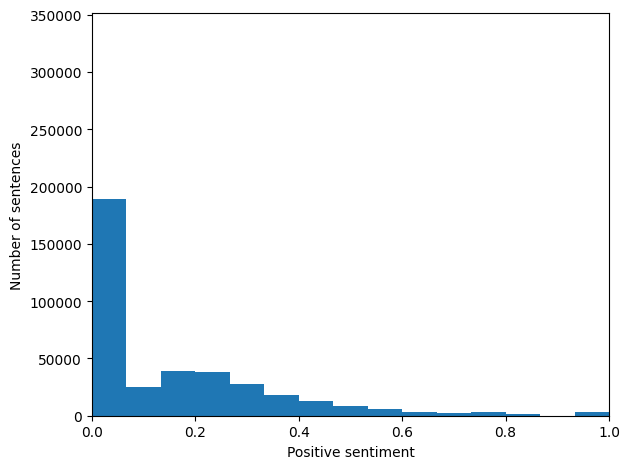

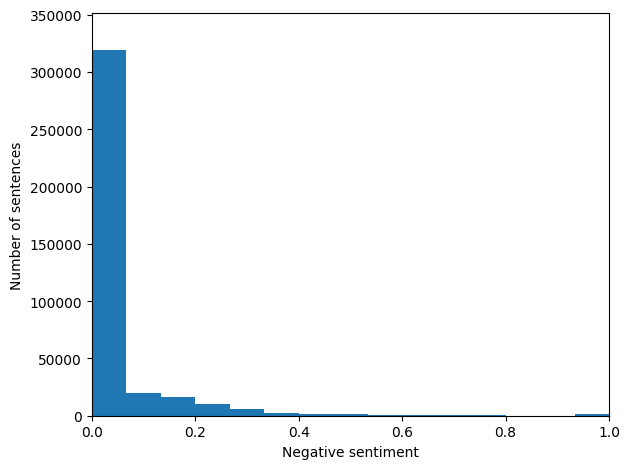

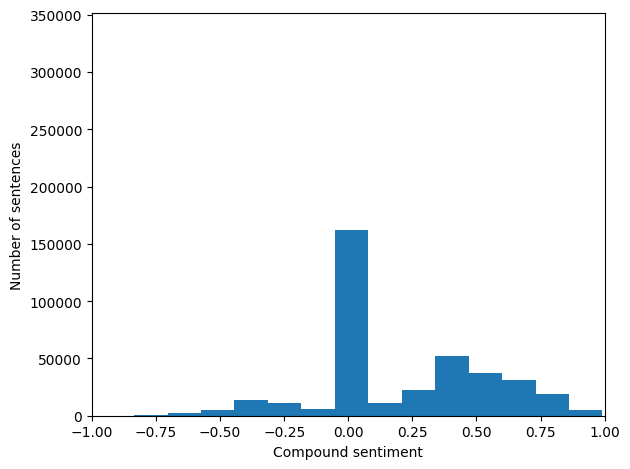

Number of positive sentences: 181176
Number of negative sentences: 40760
Number of neutral sentences: 157496


NameError: name 'PA_nonlocal_docs' is not defined

In [17]:
PA_local_sentences = sentiment_analysis(PA_local_docs)
PA_nonlocal_sentences = sentiment_analysis(PA_nonlocal_docs)